In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q /content/drive/MyDrive/DS_Project.zip

پروژه ساختمان داده.pdf:  mismatching "local" filename (┘╛╪▒┘И┌Ш┘З ╪│╪з╪о╪к┘Е╪з┘Ж ╪п╪з╪п┘З.pdf),
         continuing with "central" filename version


for less computation time , we saved data in df_numeric.csv so no need to run this cells  

In [4]:
import os

folder_path = "/content/data"
file_list = os.listdir(folder_path)
doc = "document_"
nums = []
for x in file_list:
  num = x[len(doc):x.find('.')]
  nums.append(int(num))
text_list = []
for num in sorted(nums):
    file_name = f"{doc}{num}.txt"
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r") as f:
            text = f.read()
            text_list.append(text)

print(text_list[2])

Sydney, New South Wales, Australia is located in a coastal basin bordered by the Pacific Ocean to the east, the Blue Mountains to the west, the Hawkesbury River to the north and the Woronora Plateau to the south. The Sydney Statistical Division, used for census data, is the unofficial metropolitan area and covers 12,145 km² (4,689 mi²). This area includes the Central Coast and Blue Mountains as well as broad swathes of national park and other non-urban land.
This itinerary will have you crossing the country to take in the Great Barrier Reef, Australia’s iconic reef in Queensland, before heading to Western Australia to see the breath taking Ningaloo Reef, one of Australia’s best kept secrets. View more information. 10 day-Sydney, rock and reef. It’s easy to see why Hamilton Island is one of the most popular spots for a getaway on the Great Barrier Reef. With palm-fringed beaches, top restaurants and stylish resorts, there’s plenty to do on land, while those keen to explore the clear wat

In [ ]:
print(text_list[5].split('\n')[0])

Get the Latest health and medical information delivered direct to your inbox! The lungs are a pair of spongy, air-filled organs located on either side of the chest (thorax). The trachea (windpipe) conducts inhaled air into the lungs through its tubular branches, called bronchi. The bronchi then divide into smaller and smaller branches (bronchioles), finally becoming microscopic. Between the alveoli is a thin layer of cells called the interstitium, which contains blood vessels and cells that help support the alveoli. The lungs are covered by a thin tissue layer called the pleura. The same kind of thin tissue lines the inside of the chest cavity -- also called pleura.



Part 0:

In [5]:
def preprocess(text):
  text = text.lower()
  words = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word.isalnum() or word.isdigit() and word not in stop_words]
  return filtered_words

tokenizing:

In [ ]:
Tokenized_list = [preprocess(text) for text in text_list]


NameError: ignored

In [ ]:
print(Tokenized_list[0])

instead of creating Tokenized_list everytime from scratch we use saved csv

In [15]:
# reading numeric Tokenized_set from mapped_list from saved csv
import pandas as pd
X = pd.read_csv('/content/drive/MyDrive/df_numeric.csv')


In [16]:
X = X.drop(columns = ['Unnamed: 0'])
X.shape

(50001, 1117)

In [10]:
Tokenized_list = []
for index , row in X.iterrows():
    tl = row.dropna().values
    Tokenized_list.append(tl)
Tokenized_list = [tl.astype(int) for tl in Tokenized_list]

In [ ]:
Tokenized_set = [set(l) for l in Tokenized_list]

In [ ]:
V = set()
for i in Tokenized_set:
    V.update(i)

In [ ]:
VocabIndex = {word: index for index, word in enumerate(V)}

In [ ]:
Mapped_list = []
for Tl in Tokenized_list:
  ml = [VocabIndex[word] for word in Tl]
  Mapped_list.append(ml)

In [ ]:
# Tokenized_list = Mapped_list

In [ ]:
# import pandas as pd
# df_numeric = pd.DataFrame(Tokenized_list)

In [ ]:
# df_numeric.to_csv('df_numerc.csv')

In [ ]:
IDF = dict()
for text in Tokenized_set:
  for word in text:
    if word in IDF.keys():
      IDF[word] += 1
    else:
      IDF[word] = 1

Part1

In [ ]:
from collections import Counter
def tf_idf(ind):
  tf = Counter(Tokenized_list[ind])

  w = []
  for i in Tokenized_list[ind]:
    w.append(np.log10(1 + tf[i]) * np.log10(float(len(Tokenized_list)) /(1.0 + float(IDF[i])) ))

  #print(idf)
  return w

Par2:


In [ ]:
def doc_tf_idf_vectorizer(ind):
  w = tf_idf(ind)
  vec = np.zeros(len(V))
  for weight , word in zip(w , Tokenized_list[ind]):
    vec[word] = weight
  return vec

In [ ]:
import numpy as np
X = []
rand_list = np.random.randint(0 , 50000 , 1500)
for i in rand_list:
  X.append(doc_tf_idf_vectorizer(i))

In [18]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA #*
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import DictionaryLearning
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import LatentDirichletAllocation
X = X.dropna()
model = PCA(n_components=2)
X_pca = model.fit_transform(X)

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

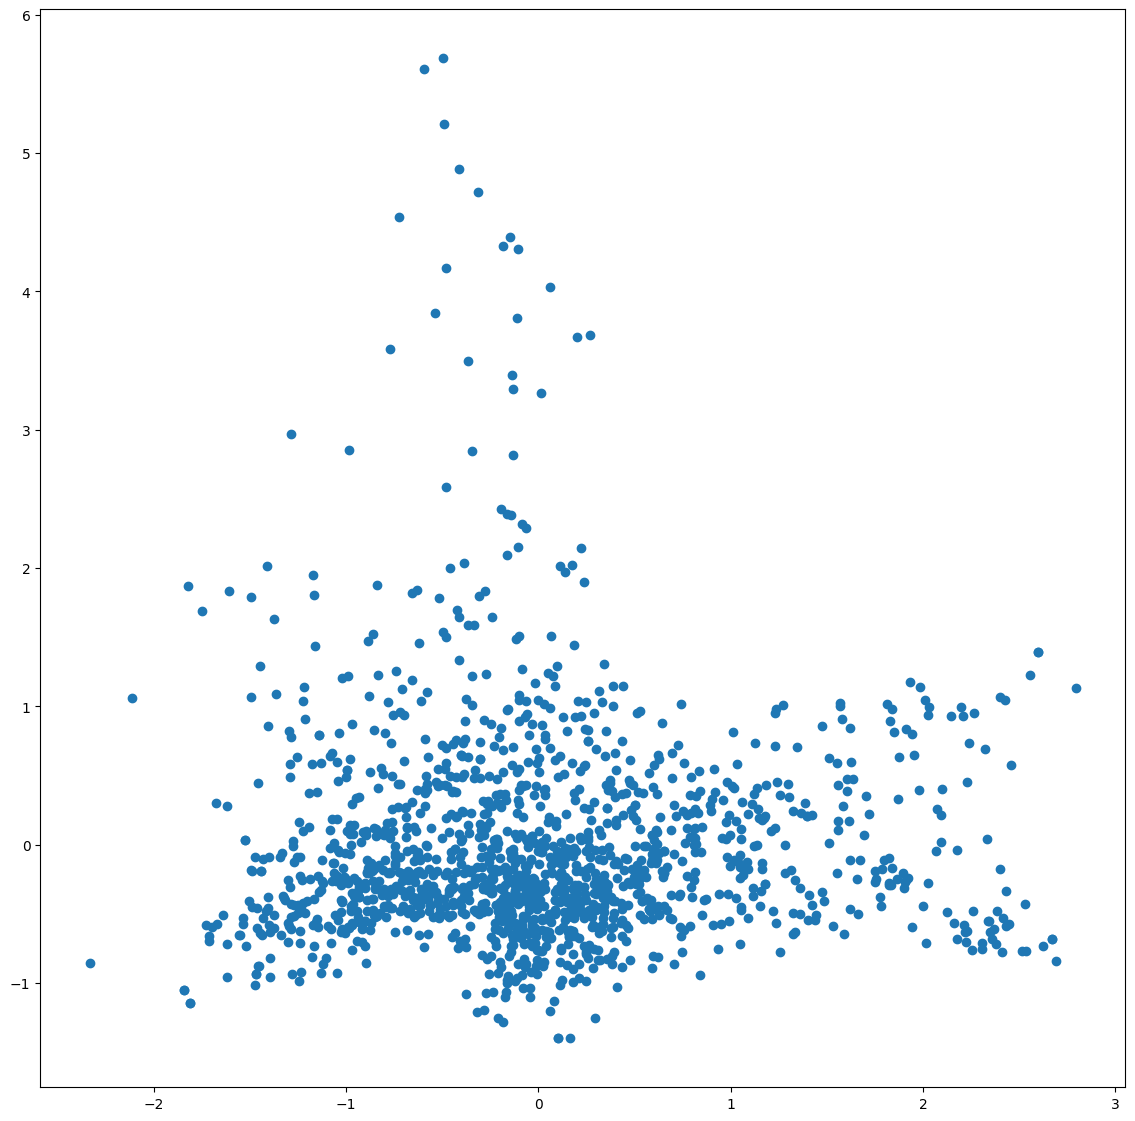

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.scatter(X_pca[:, 0], X_pca[:, 1])

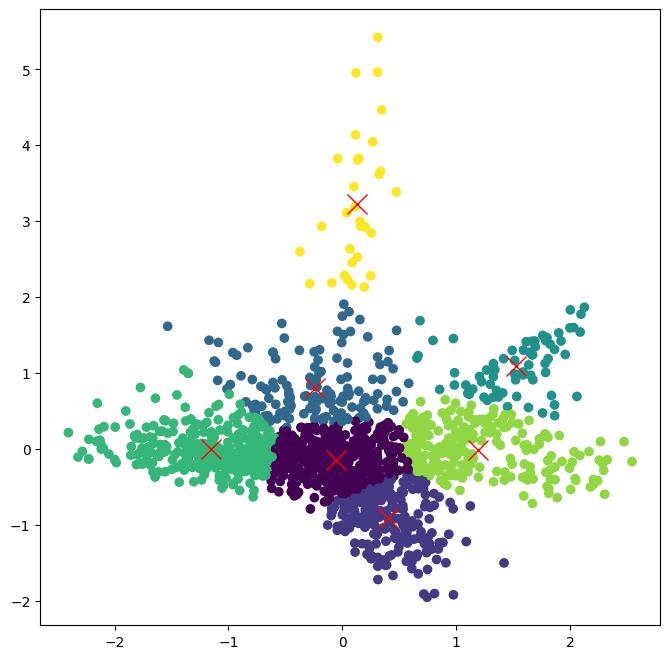

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=7, n_init=10)
#cluster = DBSCAN(eps = 0.21 )
cluster.fit(X_pca)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1] , c=cluster.labels_)
for x, y in cluster.cluster_centers_:
    ax.plot(x, y, marker='x', markersize=15, color='r')

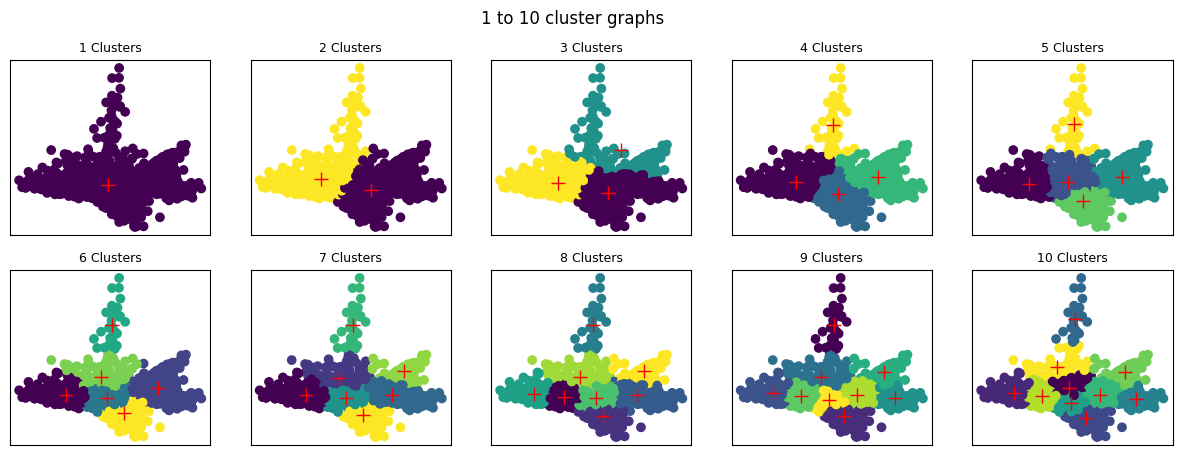

In [ ]:
from sklearn.metrics import silhouette_score

inertia_list, silhouette_list = [], [None]

fig3, ax3 = plt.subplots(2, 5, figsize=(15, 5))
fig3.suptitle('1 to 10 cluster graphs')
ax3 = ax3.flatten()

for cluster_count in range(1, 11):
    cluster = KMeans(n_clusters=cluster_count, n_init=10)
    cluster.fit(X_pca)

    current_axis = ax3[cluster_count -1]
    current_axis.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=cluster.labels_)
    current_axis.set_title(f'{cluster_count} Clusters', size=9)
    current_axis.get_xaxis().set_visible(False), current_axis.get_yaxis().set_visible(False)

    for x, y in cluster.cluster_centers_:
        current_axis.plot(x, y, marker='+', markersize=10, color='r')

    if cluster_count > 1:
        silhouette_list.append(silhouette_score(X_pca, labels=cluster.labels_))
    inertia_list.append(cluster.inertia_)

metric_df = pd.DataFrame(zip(inertia_list, silhouette_list), index=range(1, 11), columns=['Inertia', 'Silhouette'])

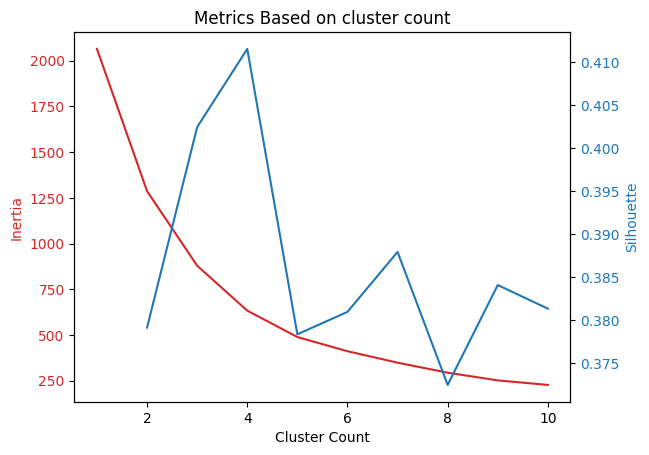

In [ ]:
fig4, ax4 = plt.subplots()
ax4.set_title('Metrics Based on cluster count')
color = 'tab:red'
ax4.set_xlabel('Cluster Count')
ax4.set_ylabel('Inertia', color=color)
ax4.plot(metric_df.index, metric_df['Inertia'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

ax4_twin = ax4.twinx()

color = 'tab:blue'
ax4_twin.set_ylabel('Silhouette', color=color)
ax4_twin.plot(metric_df.index, metric_df['Silhouette'], color=color)
ax4_twin.tick_params(axis='y', labelcolor=color)

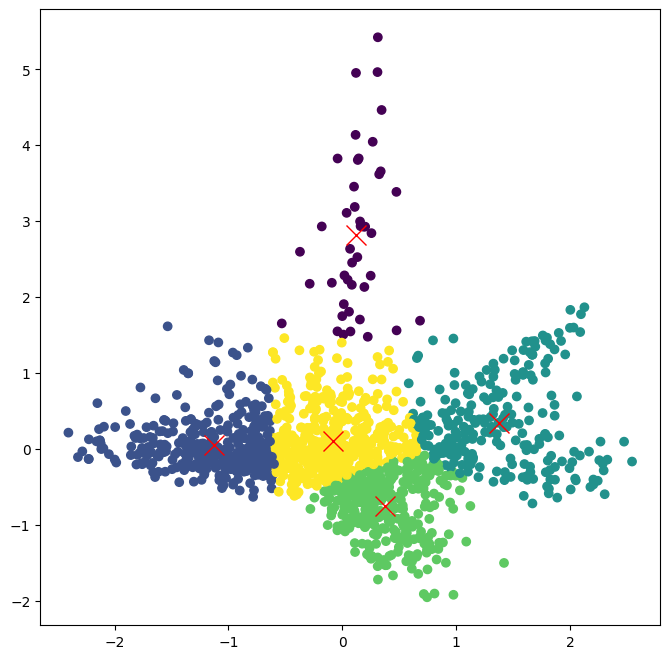

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, n_init=10)
#cluster = DBSCAN(eps = 0.21 )
cluster.fit(X_pca)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1] , c=cluster.labels_)
for x, y in cluster.cluster_centers_:
    ax.plot(x, y, marker='x', markersize=15, color='r')

<ipython-input-21-d3f419f15e0f>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='white', label='Cluster Center', edgecolor='black')


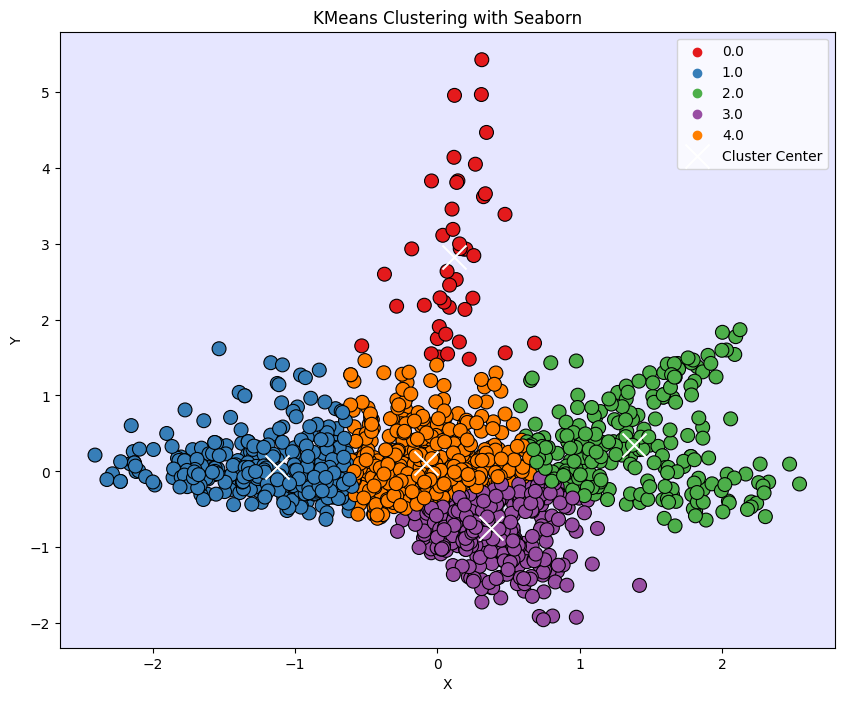

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_plot = np.column_stack((X_pca, cluster.labels_))

import pandas as pd
df = pd.DataFrame(data=X_plot, columns=['X', 'Y', 'Cluster'])

plt.figure(figsize=(10, 8))

sns.scatterplot(x='X', y='Y', hue='Cluster', data=df, palette='Set1', s=100, edgecolor='black')

cluster_centers = cluster.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='white', label='Cluster Center', edgecolor='black')

plt.gca().set_facecolor((0.9, 0.9, 1.0, 1.0))

plt.title('KMeans Clustering with Seaborn')
plt.legend()
plt.show()

Trying dbscan


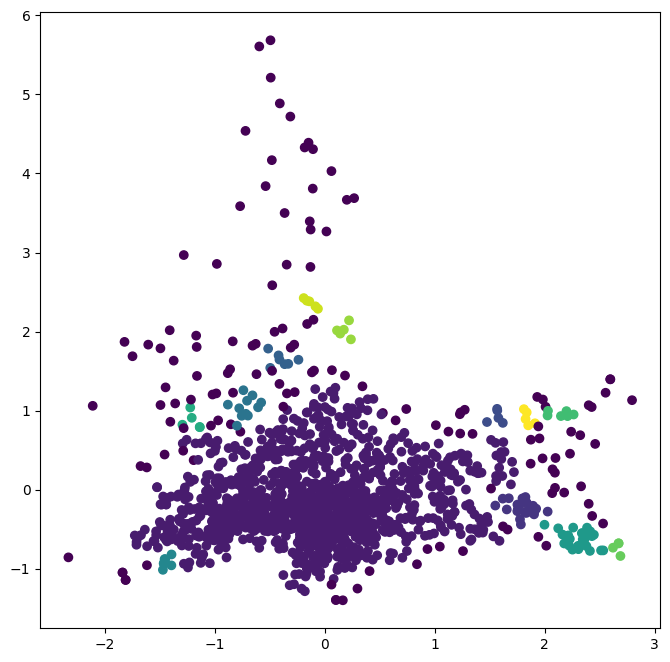

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
cluster = DBSCAN(eps = 0.14 )
cluster.fit(X_pca)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1] , c=cluster.labels_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA #*
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import DictionaryLearning
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import LatentDirichletAllocation

model = PCA(n_components=3)
X_pca = model.fit_transform(X)
X_pca


array([[-0.74429402, -0.05282749, -0.49652612],
       [-1.23857307, -0.69552379, -1.08683417],
       [ 0.12897536, -0.23142649,  0.08988144],
       ...,
       [ 0.18422449, -0.3718682 ,  0.27779229],
       [-0.35665331, -0.27918308,  0.66616849],
       [-0.06408826, -0.19839714,  0.20641351]])

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, n_init=10)
cluster.fit(X_pca)

X_plot = X_pca

X_pca_clustered = np.column_stack((X_pca, cluster.labels_))

df = pd.DataFrame(data=X_pca_clustered, columns=['X', 'Y', 'Z', 'Cluster'])


fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Cluster', opacity=0.7,
                    title='Interactive 3D Plot with Cluster Coloring')
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, n_init=10)
#cluster = DBSCAN(eps = 0.21 )
cluster.fit(X_pca)

X_plot = X_pca

X_pca_clustered = np.column_stack((X_pca, cluster.labels_))

df = pd.DataFrame(data=X_pca_clustered, columns=['X', 'Y', 'Z', 'Cluster'])

fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Cluster', opacity=0.7,
                    title='Interactive 3D Plot with Cluster Coloring')

cluster_centers = cluster.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['X', 'Y', 'Z'])
cluster_centers_df['Cluster'] = ['Center'] * len(cluster_centers_df)

fig.add_trace(px.scatter_3d(cluster_centers_df, x='X', y='Y', z='Z', color='Cluster',
                             opacity=1, size=[100 , 100 , 100 , 100 , 100]).data[0] )

fig.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=5, n_init=10)
cluster = DBSCAN(eps = 0.275 , algorithm = 'ball_tree')
cluster.fit(X_pca)

X_plot = X_pca

X_pca_clustered = np.column_stack((X_pca, cluster.labels_))

df = pd.DataFrame(data=X_pca_clustered, columns=['X', 'Y', 'Z', 'Cluster'])

fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Cluster', opacity=0.7,
                    title='Interactive 3D Plot with Cluster Coloring')

fig.show()
